In [1]:
from scipy.io import loadmat
annots = loadmat("results/Gore_Range_Albers_2000m/Gore_Range_Albers_2000m_kernel_x4.mat")

In [2]:
k = annots["Kernel"]
k.shape

(45, 45)

In [ ]:
!pip install matplotlib

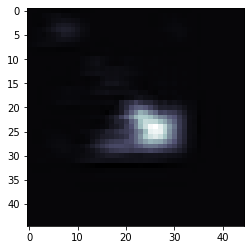

In [3]:
import matplotlib.pyplot as plt
plt.imshow(k, cmap="bone")

In [11]:
type(k)

numpy.ndarray

In [4]:
import rasterio as rio
import numpy as np

dem = rio.open("../../Dataset/Gore_Range_Albers_2000m.asc").read(1).astype('float64')

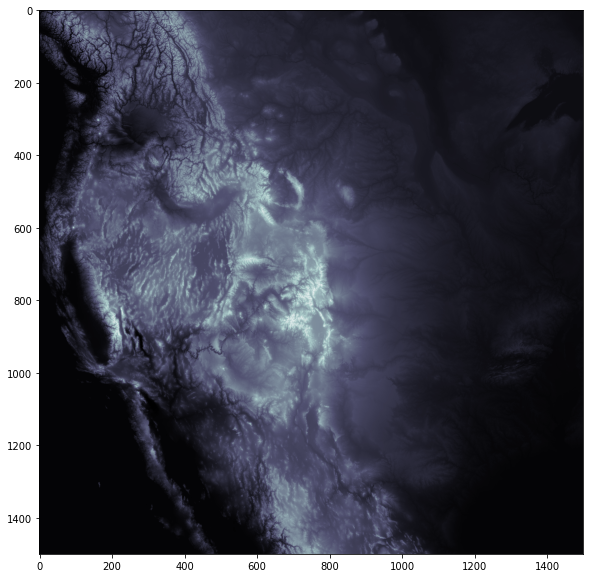

In [5]:
plt.figure(figsize=(20,10))
plt.imshow(dem, cmap="bone")

In [21]:
k.shape

(23, 23)

In [7]:
from scipy.ndimage import correlate

def numeric_kernel(im, kernel, scale_factor, output_shape, kernel_shift_flag):
    # See kernel_shift function to understand what this is
    if kernel_shift_flag:
        kernel = kernel_shift(kernel, scale_factor)

    # First run a correlation (convolution with flipped kernel)
    out_im = np.zeros_like(im)
    out_im = correlate(im, kernel)
    print(out_im.shape)
    # Then subsample and return
    return out_im[np.round(np.linspace(0, im.shape[0] - 1 / scale_factor[0], output_shape[0])).astype(int)[:, None],
           np.round(np.linspace(0, im.shape[1] - 1 / scale_factor[1], output_shape[1])).astype(int)]

In [16]:
down_scaled_x2 = numeric_kernel(dem, k, [0.5,0.5], (1500, 1500), False)  
down_scaled_x4 = numeric_kernel(dem, k, [0.25,0.25], (375, 375), False)  

(1500, 1500)
(1500, 1500)


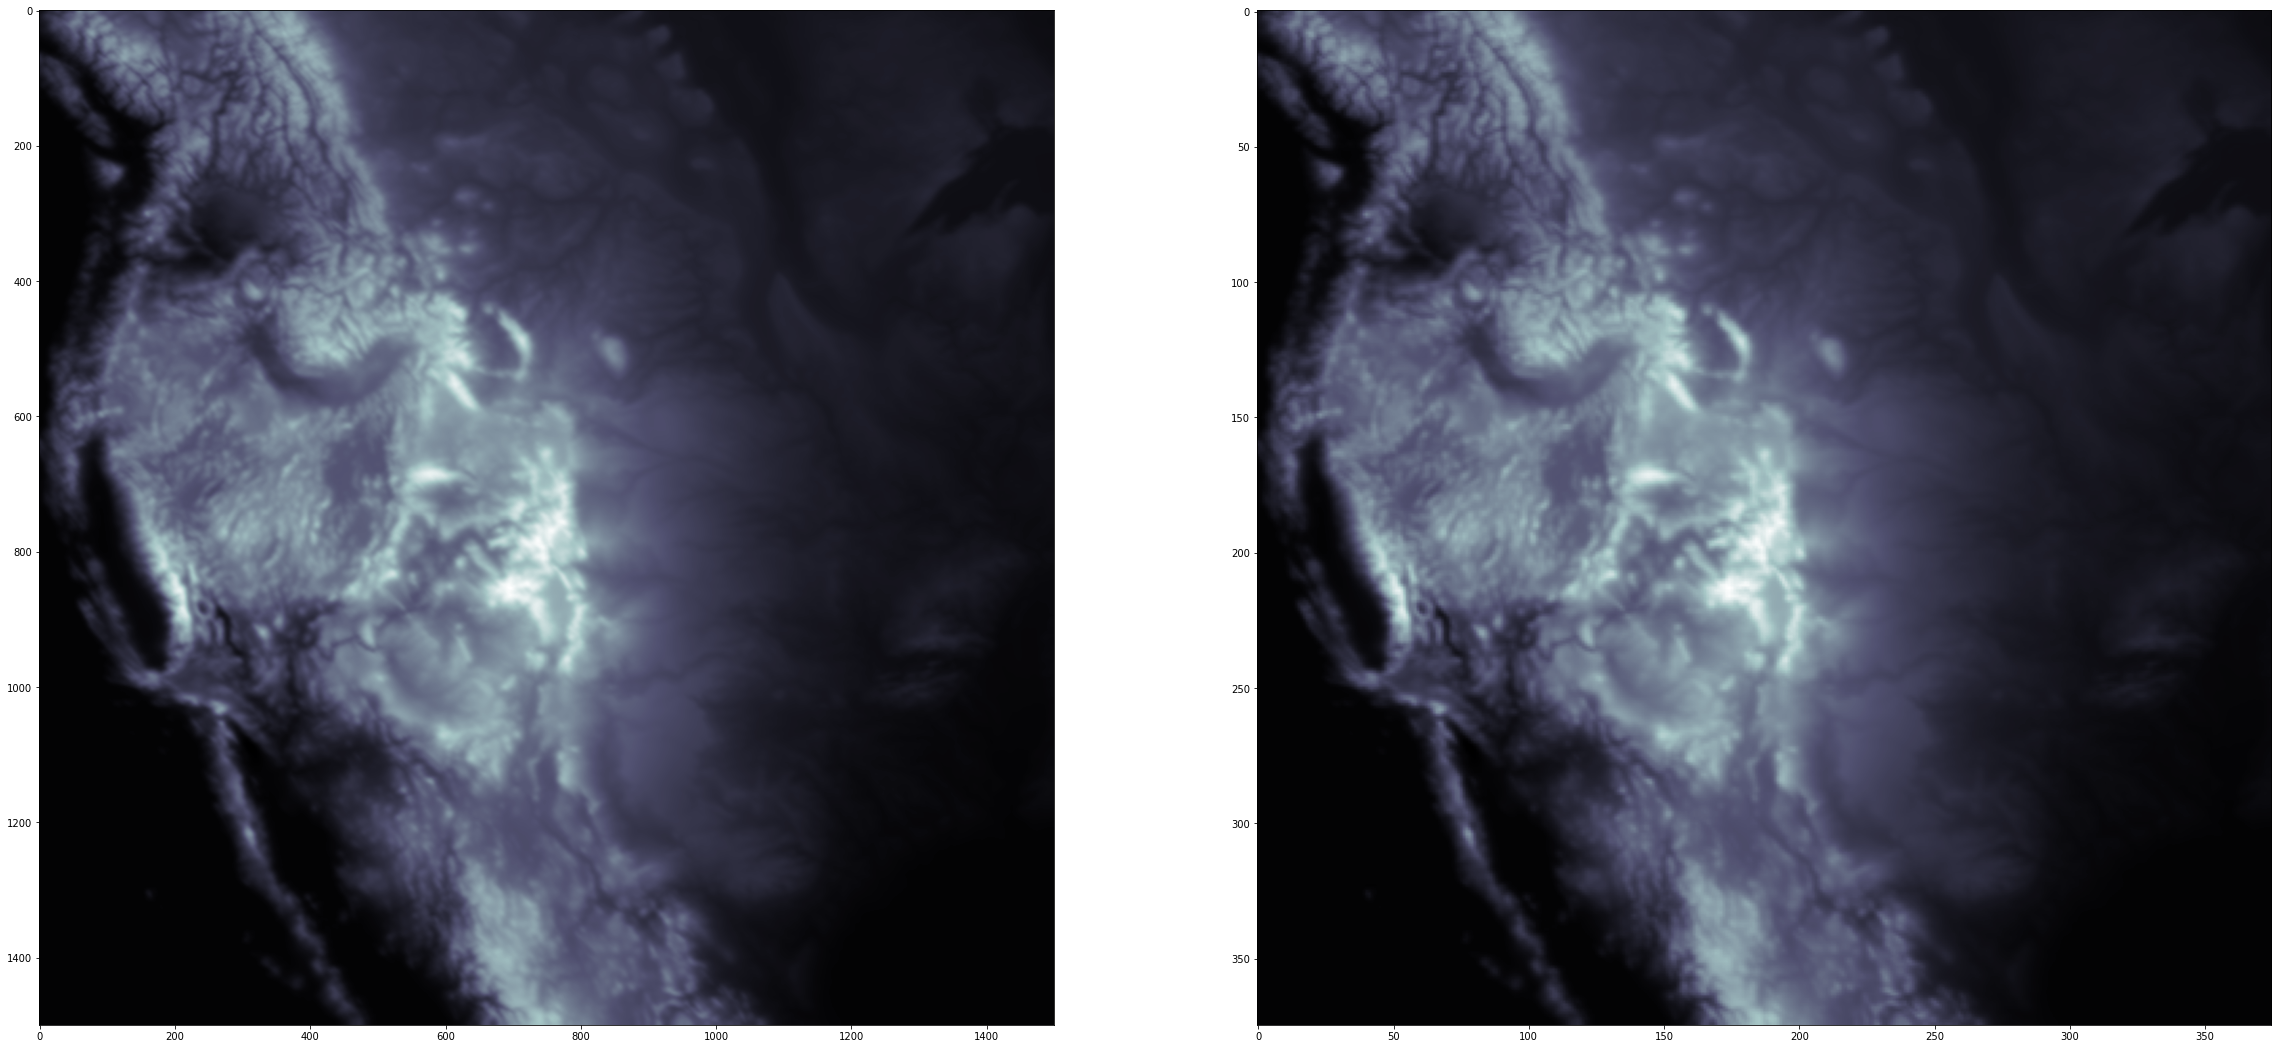

In [17]:
fig, ax = plt.subplots(1, 2, figsize=(40,20))
# plt.figure()
ax[0].imshow(down_scaled_x2, cmap="bone")
ax[1].imshow(down_scaled_x4, cmap="bone")